<a href="https://colab.research.google.com/github/vault5673/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    float64
 1   area              530 non-null    float64
 2   bedrooms          530 non-null    int64  
 3   bathrooms         530 non-null    int64  
 4   stories           530 non-null    int64  
 5   mainroad          530 non-null    int64  
 6   guestroom         530 non-null    int64  
 7   basement          530 non-null    int64  
 8   hotwaterheating   530 non-null    int64  
 9   airconditioning   530 non-null    int64  
 10  parking           530 non-null    int64  
 11  prefarea          530 non-null    int64  
 12  furnishingstatus  530 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 58.0 KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.300000e+02,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,3.217552e-16,-5.362587e-17,2.943396,1.260377,1.788679,0.854717,0.175472,0.34717,0.043396,0.305660,0.664151,0.222642,1.081132
std,1.000945e+00,1.000945e+00,0.730515,0.464359,0.861190,0.352719,0.380729,0.47652,0.203940,0.461122,0.843320,0.416413,0.759951
min,-1.787684e+00,-1.645302e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.341363e-01,-7.301788e-01,2.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,-2.073626e-01,-2.708085e-01,3.000000,1.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.266957e-01,6.048888e-01,3.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,2.000000
max,2.821586e+00,5.082483e+00,6.000000,3.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
numeric_data = df.select_dtypes(include=['number'])
print(numeric_data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


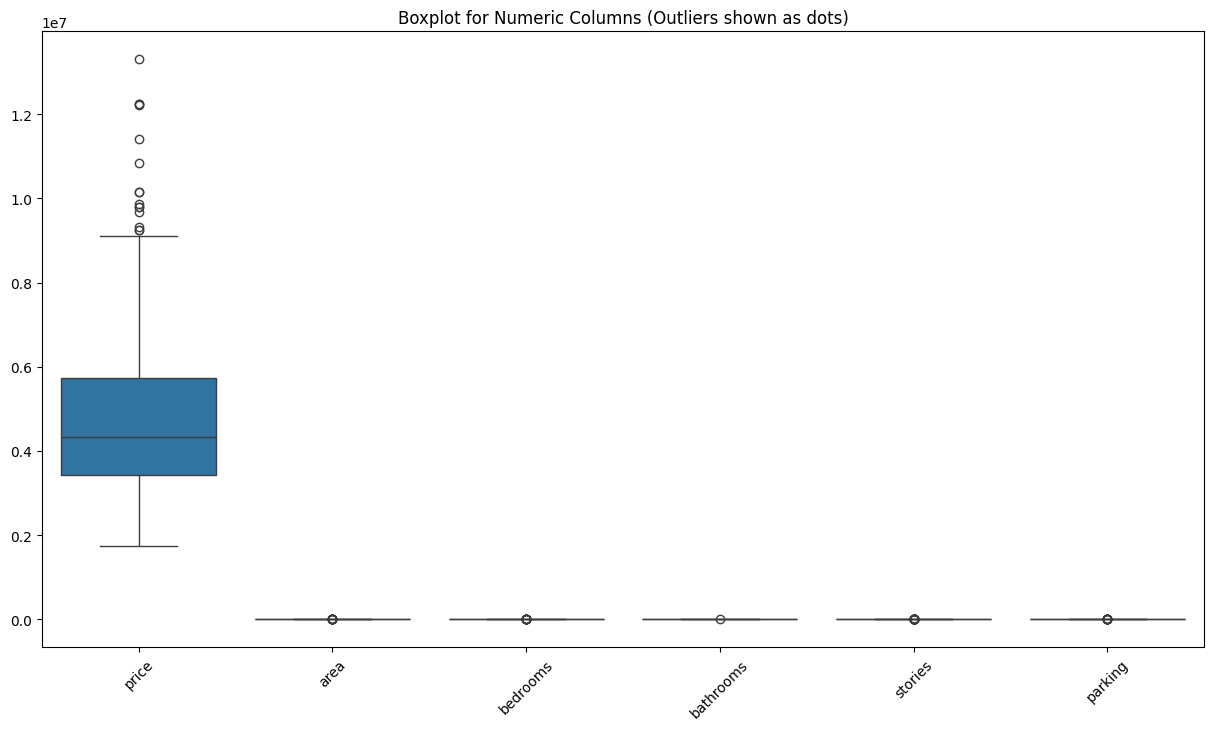

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns (Outliers shown as dots)")
plt.show()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

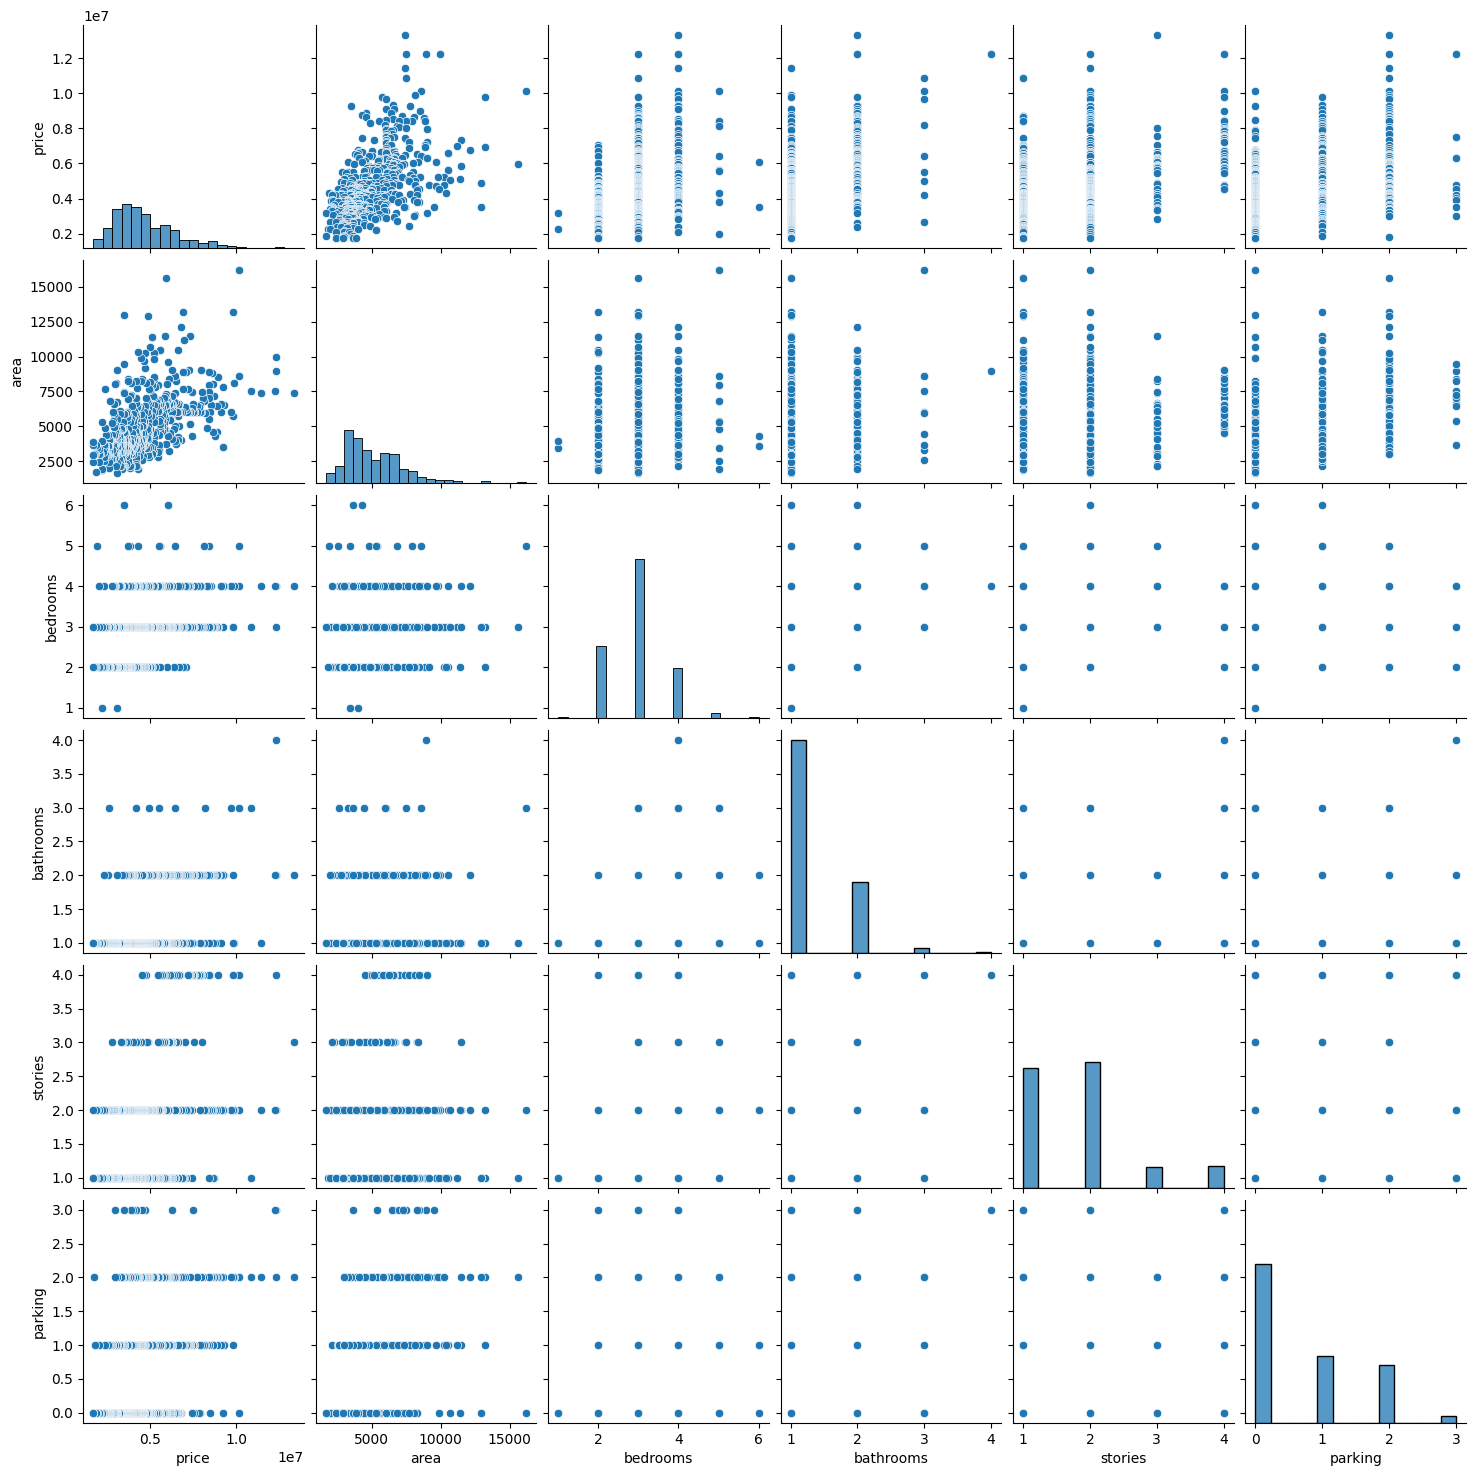

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.pairplot(numeric_data[selected_cols])
plt.show()

In [ ]:
categorical_data = df.select_dtypes(include=['object', 'category'])
print(categorical_data.columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
(df[cat_cols].head())

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
15,1,0,1,0,0,0,1
16,1,1,1,0,1,1,2
17,1,0,0,0,1,0,0
18,1,1,0,0,1,0,0
19,1,0,0,0,1,1,1


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,2.821586,0.452609,4,1,2,1,0,1,0,0,2,0,1
16,2.821586,0.741976,4,2,2,1,1,1,0,1,1,1,2
17,2.733790,1.658306,3,2,4,1,0,0,0,1,2,0,0
18,2.689893,-0.222581,3,2,2,1,1,0,0,1,2,0,0
19,2.667944,0.655166,3,2,2,1,0,0,0,1,1,1,1


In [ ]:
cols_to_scale = ['price', 'area']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

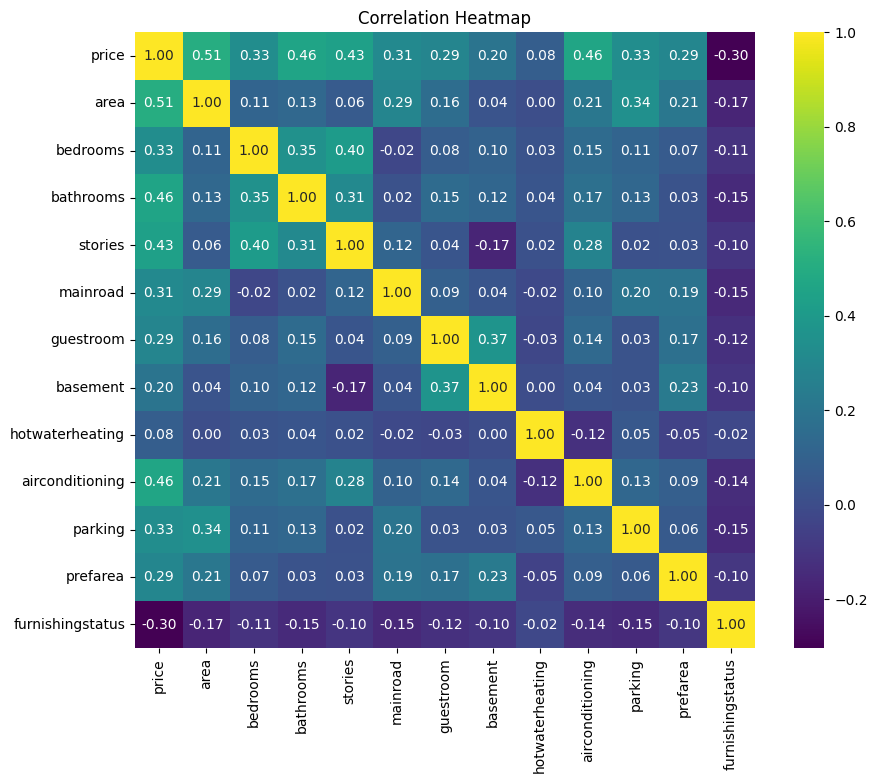

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.66


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.50


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.46


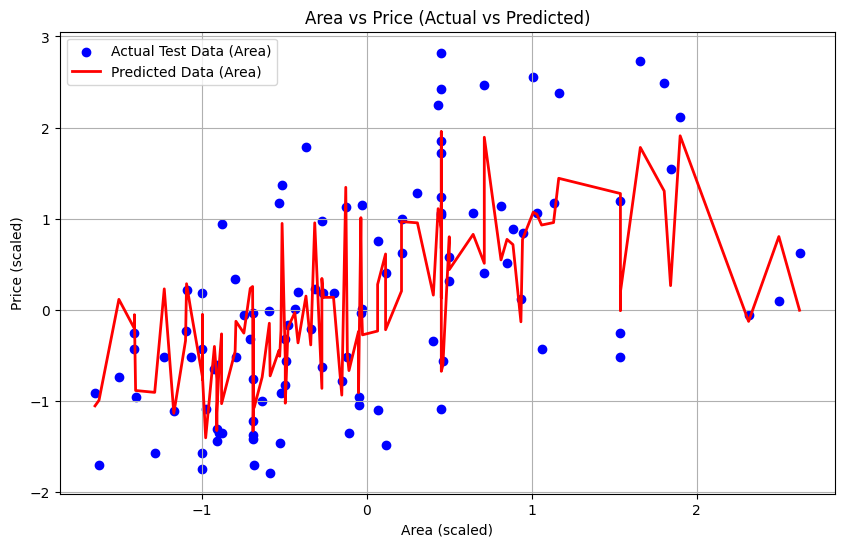

In [ ]:
sorted_indices = X_test['area'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
plt.figure(figsize=(10,6))
plt.scatter(X_test_sorted['area'], y_test.iloc[sorted_indices], color='blue', label='Actual Test Data (Area)')
plt.plot(X_test_sorted['area'], y_pred_sorted, color='red', label='Predicted Data (Area)', linewidth=2)
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Area vs Price (Actual vs Predicted)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Intercept: {model.intercept_}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef}")

Intercept: -1.8417141166519135
Coefficient for area: 0.258860612486626
Coefficient for bedrooms: 0.0656302854631774
Coefficient for bathrooms: 0.5110244751269781
Coefficient for stories: 0.2579038998910134
Coefficient for mainroad: 0.2548275900062038
Coefficient for guestroom: 0.24112520265868234
Coefficient for basement: 0.20017218967886238
Coefficient for hotwaterheating: 0.5050092208227969
Coefficient for airconditioning: 0.4724191530176493
Coefficient for parking: 0.10825904220812532
Coefficient for prefarea: 0.3656866850682371
Coefficient for furnishingstatus: -0.10522461489136907
